# Кластеризация исполнителей по жанрам с помощью K-means

Попробуем кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", 
                        engine='openpyxl')

In [4]:
ratings.shape

(5000, 1001)

In [5]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [6]:
ratings = ratings.T

In [7]:
ratings.index.name = 'исполнители'
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
исполнители,,,,,,,,,,,,,,,,,,,,,
user,0.000000,1.000000,2.000000,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.000000
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выкинем строку под названием `user`.

In [8]:
ratings = ratings.drop(['user'], axis=0)

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, the beatles to yellowcard
Columns: 5000 entries, 0 to 4999
dtypes: float64(5000)
memory usage: 38.2+ MB


In [10]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
исполнители,,,,,,,,,,,,,,,,,,,,,
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заполним пропуски нулями.

In [11]:
ratings.fillna(0, inplace=True)

In [12]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
исполнители,,,,,,,,,,,,,,,,,,,,,
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Нормализуем данные при помощи `normalize`.

In [13]:
type(ratings)

pandas.core.frame.DataFrame

In [14]:
from sklearn.preprocessing import normalize
import numpy as np

names = ratings.select_dtypes(include=np.number).columns.tolist()

d = normalize(ratings) 
ratings_norm = pd.DataFrame(d, 
                            columns=names,
                            index=ratings.index) 
ratings_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
исполнители,,,,,,,,,,,,,,,,,,,,,
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622
coldplay,0.000000,0.000000,0.000000,0.0,0.011129,0.000000,0.0,0.0,0.000000,0.000000,...,0.144628,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.010260,0.000000,0.0,0.0,0.000000,0.019597,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [15]:
normalize(ratings)

array([[0.        , 0.        , 0.        , ..., 0.02130159, 0.        ,
        0.        ],
       [0.00934824, 0.08468808, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0172781 , 0.02014407, ..., 0.        , 0.        ,
        0.01962161],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
ratings_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.001526,0.001203,0.001456,0.001731,0.001269,0.001992,0.001197,0.001633,0.001457,0.001490,...,0.001223,0.001636,0.001446,0.001304,0.001054,0.002013,0.000959,0.001811,0.001455,0.001899
std,0.008769,0.009074,0.007445,0.023479,0.008454,0.018744,0.011924,0.012095,0.007436,0.008132,...,0.011675,0.015309,0.010848,0.013581,0.011982,0.022497,0.030310,0.025123,0.016342,0.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.133846,0.131586,0.091861,0.630633,0.132291,0.371030,0.284258,0.190163,0.086110,0.117387,...,0.182879,0.311883,0.170176,0.341052,0.263335,0.422269,0.958500,0.697849,0.416269,0.124755


Применим KMeans с 5ю кластерами на преобразованной матрице (сделаем fit, а затем вычислим кластеры при помощи predict).

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(ratings_norm)
y_predicted = kmeans.predict(ratings_norm)
print(y_predicted[:10])

[3 1 1 3 1 1 3 3 3 2]


Выведем на экран центры кластеров (центроиды)

In [18]:
print("5-х кластеров:")
print(kmeans.cluster_centers_)

5-х кластеров:
[[ 3.38501777e-04  2.02893713e-03  0.00000000e+00 ...  8.67361738e-19
   6.38042883e-03 -1.08420217e-18]
 [ 5.46735539e-04  2.12220505e-03  3.11850673e-03 ...  7.59874951e-04
   3.09449613e-03  5.59858194e-03]
 [ 1.45698629e-03  6.50521303e-19  1.05275139e-04 ... -4.33680869e-19
  -2.16840434e-19 -1.30104261e-18]
 [ 1.97626325e-03  1.14998129e-03  8.47424009e-04 ...  3.41592087e-03
   3.26194973e-04  7.06666828e-04]
 [ 2.48926246e-03  1.26210208e-04  1.60442725e-03 ...  9.29583162e-04
   7.01806205e-04  5.93913191e-04]]


In [19]:
kmeans.cluster_centers_.shape

(5, 5000)

In [20]:
kmeans.cluster_centers_

array([[ 3.38501777e-04,  2.02893713e-03,  0.00000000e+00, ...,
         8.67361738e-19,  6.38042883e-03, -1.08420217e-18],
       [ 5.46735539e-04,  2.12220505e-03,  3.11850673e-03, ...,
         7.59874951e-04,  3.09449613e-03,  5.59858194e-03],
       [ 1.45698629e-03,  6.50521303e-19,  1.05275139e-04, ...,
        -4.33680869e-19, -2.16840434e-19, -1.30104261e-18],
       [ 1.97626325e-03,  1.14998129e-03,  8.47424009e-04, ...,
         3.41592087e-03,  3.26194973e-04,  7.06666828e-04],
       [ 2.48926246e-03,  1.26210208e-04,  1.60442725e-03, ...,
         9.29583162e-04,  7.01806205e-04,  5.93913191e-04]])

In [21]:
normalize(kmeans.cluster_centers_)

array([[ 1.35003241e-03,  8.09192468e-03,  0.00000000e+00, ...,
         3.45926236e-18,  2.54467961e-02, -4.32407795e-18],
       [ 3.12320991e-03,  1.21230309e-02,  1.78143735e-02, ...,
         4.34076222e-03,  1.76772137e-02,  3.19817267e-02],
       [ 5.85089224e-03,  2.61233072e-18,  4.22758606e-04, ...,
        -1.74155381e-18, -8.70776907e-19, -5.22466144e-18],
       [ 1.64474171e-02,  9.57069959e-03,  7.05267183e-03, ...,
         2.84289431e-02,  2.71475209e-03,  5.88122259e-03],
       [ 1.20403380e-02,  6.10467391e-04,  7.76046988e-03, ...,
         4.49630991e-03,  3.39457331e-03,  2.87270454e-03]])

In [22]:
ratings.index

Index(['the beatles', 'radiohead', 'deathcab for cutie', 'coldplay',
       'modest mouse', 'sufjan stevens', 'dylan. bob', 'red hot clili peppers',
       'pink fluid', 'kanye west',
       ...
       'municipal waste', 'townes van zandt', 'curtis mayfield', 'jewel',
       'lamb', 'michal w. smith', '群星', 'agalloch', 'meshuggah', 'yellowcard'],
      dtype='object', name='исполнители', length=1000)

In [23]:
cluster_centers_ = pd.DataFrame(kmeans.cluster_centers_, 
                                columns=names) 
cluster_centers_.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000339,2.028937e-03,0.000000,-2.168404e-19,4.336809e-19,-8.673617e-19,0.000000,8.673617e-19,-8.673617e-19,6.505213e-19,...,4.618060e-03,-8.673617e-19,-4.336809e-19,8.220357e-04,5.359561e-04,2.320940e-04,1.084202e-19,8.673617e-19,6.380429e-03,-1.084202e-18
1,0.000547,2.122205e-03,0.003119,4.987330e-18,4.211622e-03,4.760851e-03,0.000066,-3.469447e-18,2.536635e-03,1.422258e-03,...,4.119049e-04,2.385245e-18,1.690872e-03,1.796899e-03,6.037638e-04,-4.770490e-18,-1.626303e-18,7.598750e-04,3.094496e-03,5.598582e-03
2,0.001457,6.505213e-19,0.000105,4.383447e-03,1.000423e-03,-8.673617e-19,0.011526,1.794832e-02,1.093696e-03,7.198457e-04,...,4.336809e-19,1.031477e-02,-1.084202e-18,2.952614e-04,4.002072e-04,1.629013e-04,-5.421011e-19,-4.336809e-19,-2.168404e-19,-1.301043e-18
3,0.001976,1.149981e-03,0.000847,3.104336e-03,1.048216e-04,1.613773e-03,0.000093,3.903128e-18,1.574095e-03,1.943021e-03,...,1.804437e-03,1.005907e-03,3.632267e-04,1.737578e-03,1.919847e-03,3.447217e-04,2.234266e-03,3.415921e-03,3.261950e-04,7.066668e-04
4,0.002489,1.262102e-04,0.001604,6.505213e-19,-6.505213e-19,1.241784e-04,0.000599,-1.734723e-18,1.734723e-18,1.368026e-03,...,4.311462e-04,1.748000e-03,5.494984e-03,-1.301043e-18,1.517883e-18,1.208149e-02,-1.192622e-18,9.295832e-04,7.018062e-04,5.939132e-04


In [24]:
cluster_centers_

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000339,2.028937e-03,0.000000,-2.168404e-19,4.336809e-19,-8.673617e-19,0.000000,8.673617e-19,-8.673617e-19,6.505213e-19,...,4.618060e-03,-8.673617e-19,-4.336809e-19,8.220357e-04,5.359561e-04,2.320940e-04,1.084202e-19,8.673617e-19,6.380429e-03,-1.084202e-18
1,0.000547,2.122205e-03,0.003119,4.987330e-18,4.211622e-03,4.760851e-03,0.000066,-3.469447e-18,2.536635e-03,1.422258e-03,...,4.119049e-04,2.385245e-18,1.690872e-03,1.796899e-03,6.037638e-04,-4.770490e-18,-1.626303e-18,7.598750e-04,3.094496e-03,5.598582e-03
2,0.001457,6.505213e-19,0.000105,4.383447e-03,1.000423e-03,-8.673617e-19,0.011526,1.794832e-02,1.093696e-03,7.198457e-04,...,4.336809e-19,1.031477e-02,-1.084202e-18,2.952614e-04,4.002072e-04,1.629013e-04,-5.421011e-19,-4.336809e-19,-2.168404e-19,-1.301043e-18
3,0.001976,1.149981e-03,0.000847,3.104336e-03,1.048216e-04,1.613773e-03,0.000093,3.903128e-18,1.574095e-03,1.943021e-03,...,1.804437e-03,1.005907e-03,3.632267e-04,1.737578e-03,1.919847e-03,3.447217e-04,2.234266e-03,3.415921e-03,3.261950e-04,7.066668e-04
4,0.002489,1.262102e-04,0.001604,6.505213e-19,-6.505213e-19,1.241784e-04,0.000599,-1.734723e-18,1.734723e-18,1.368026e-03,...,4.311462e-04,1.748000e-03,5.494984e-03,-1.301043e-18,1.517883e-18,1.208149e-02,-1.192622e-18,9.295832e-04,7.018062e-04,5.939132e-04


In [25]:
normalize(cluster_centers_)

array([[ 1.35003241e-03,  8.09192468e-03,  0.00000000e+00, ...,
         3.45926236e-18,  2.54467961e-02, -4.32407795e-18],
       [ 3.12320991e-03,  1.21230309e-02,  1.78143735e-02, ...,
         4.34076222e-03,  1.76772137e-02,  3.19817267e-02],
       [ 5.85089224e-03,  2.61233072e-18,  4.22758606e-04, ...,
        -1.74155381e-18, -8.70776907e-19, -5.22466144e-18],
       [ 1.64474171e-02,  9.57069959e-03,  7.05267183e-03, ...,
         2.84289431e-02,  2.71475209e-03,  5.88122259e-03],
       [ 1.20403380e-02,  6.10467391e-04,  7.76046988e-03, ...,
         4.49630991e-03,  3.39457331e-03,  2.87270454e-03]])

In [26]:
cluster_centers_norm = normalize(cluster_centers_) 
cluster_centers_norm

array([[ 1.35003241e-03,  8.09192468e-03,  0.00000000e+00, ...,
         3.45926236e-18,  2.54467961e-02, -4.32407795e-18],
       [ 3.12320991e-03,  1.21230309e-02,  1.78143735e-02, ...,
         4.34076222e-03,  1.76772137e-02,  3.19817267e-02],
       [ 5.85089224e-03,  2.61233072e-18,  4.22758606e-04, ...,
        -1.74155381e-18, -8.70776907e-19, -5.22466144e-18],
       [ 1.64474171e-02,  9.57069959e-03,  7.05267183e-03, ...,
         2.84289431e-02,  2.71475209e-03,  5.88122259e-03],
       [ 1.20403380e-02,  6.10467391e-04,  7.76046988e-03, ...,
         4.49630991e-03,  3.39457331e-03,  2.87270454e-03]])

<ipython-input-27-4c7df402df43>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x=cluster_centers_pca[:, 0],


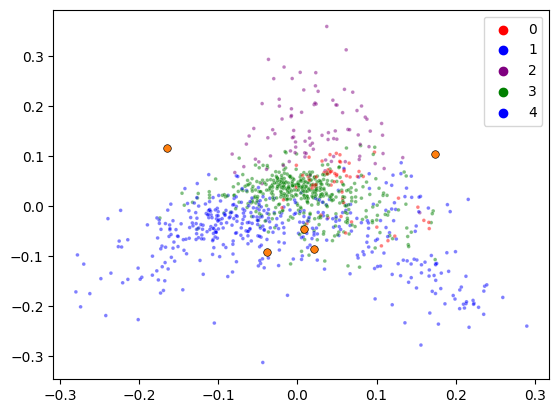

In [27]:
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA


colors = ['red', 'blue', 'purple', 'green', 'blue']
# lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
pca = PCA(n_components=2)
X_lda = pca.fit_transform(ratings_norm)

pca = PCA(n_components=2)
cluster_centers_pca = pca.fit_transform(cluster_centers_)

ax = sns.scatterplot(x=X_lda[:, 0], 
                     y=X_lda[:, 1], 
                     hue=kmeans.labels_, 
                     palette=colors, 
                     alpha=0.5, 
                     s=7)
ax = sns.scatterplot(x=cluster_centers_pca[:, 0],
                     y=cluster_centers_pca[:, 1],
                     palette=colors, 
                     alpha=1,
                     s=30,
                     ec='black', 
                     legend=True, 
                     ax=ax)
plt.show();

Для каждого кластера выведем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

In [29]:
from scipy.spatial import distance_matrix

# Центры кластеров (центроиды) сохраним в переменной centroids
centroids = kmeans.cluster_centers_

# Совместим предсказания кластеров с матрицей расстояний
data = np.hstack([y_predicted.reshape(-1, 1), 
                  distance_matrix(ratings_norm.values, centroids)])

# Посчитаем и выведем матрицу расстояний каждого из исполнителей к каждому из 5ти кластеров
dist_mat = pd.DataFrame(data,
                        columns=['y_predicted', 0, 1, 2, 3, 4],
                        index=ratings_norm.index)
dist_mat['y_predicted'] = dist_mat['y_predicted'].astype(int)
dist_mat.head(5)

,y_predicted,0,1,2,3,4
исполнители,,,,,,
the beatles,3,1.020176,0.976034,1.012469,0.966546,0.999686
radiohead,1,1.016676,0.942476,1.004648,0.977376,1.002788
deathcab for cutie,1,1.019825,0.957831,1.016160,0.984100,0.974552
coldplay,3,1.022677,0.986066,1.012808,0.972626,0.994014
modest mouse,1,1.017118,0.959847,1.013249,0.991670,0.999391


In [30]:
distance_matrix(ratings_norm.values, centroids)

array([[1.02017635, 0.97603426, 1.01246875, 0.96654583, 0.99968577],
       [1.01667591, 0.94247606, 1.00464811, 0.97737567, 1.00278815],
       [1.0198252 , 0.95783088, 1.01615971, 0.98410002, 0.97455203],
       ...,
       [0.97949927, 1.01324612, 1.02895231, 1.00459457, 1.01970549],
       [0.9766215 , 1.01217788, 1.02879454, 1.00470544, 1.01800916],
       [1.02764362, 1.01368396, 1.02882989, 1.00287007, 0.98988574]])

In [31]:
# Например, для жанра 1 получаем по убыванию к центроиду кластера
dist_mat[dist_mat['y_predicted'] == 1][1].sort_values(ascending=True)

исполнители
radiohead               0.942476
the arcade fire         0.946363
sufjan stevens          0.949895
broken social scene     0.950005
belle and sebastian     0.951343
                          ...   
god is an astronaut     1.000628
reatard, jay            1.001157
kevin devine            1.001410
manchester orchestra    1.002048
mstrkrft                1.005169
Name: 1, Length: 269, dtype: float64

In [32]:
# Посчитаем так для каждого из кластеров по убыванию расстояния от центроидов
for cluster in range(5):
    cluster_df = dist_mat[dist_mat['y_predicted'] == cluster][cluster].sort_values(ascending=True).head(10)
    print(f'Кластер {cluster}:', ', '.join(cluster_df.index.values))

Кластер 0: iron maiden, slayer, metallica, cob, megadeth, in flames, iced eatrth, as i lay dying, pantera, all that remains
Кластер 1: radiohead, the arcade fire, sufjan stevens, broken social scene, belle and sebastian, animal collective, the shins, of montreal, deathcab for cutie, beirut
Кластер 2: nas, jay-z, kanye west, a tribe called quest, the roots featuring d'angelo, lupe the gorilla, gangstarr, mos def, little brother, de la soul
Кластер 3: the beatles, coldplay, the rolling stones, u2, led zeppelin., dylan. bob, the killers, john mayer, pink fluid, r.e.m.
Кластер 4: blink-182, fall out boy, new found glory, brand new, taking back sunday, cartel, saosin, the used, paramore, jimmy eat world


Что можно сказать о смысле кластеров?

*   ### Кластер 0: Исполнители pepper, franklin aretha относятся к жанру **ФОЛК/СОУЛ** музыки.
*   ### Кластер 1: Исполнители refused, le tigre, mstrkrft относятся к жанру **ЭЛЕКТРОННОЙ** музыки.
*   ### Кластер 2: Исполнители owl nujabes, crustina aguilera, bone: thugs~n~harmony относятся к жанру **ХИП-ХОП/РЭП** музыки.
*   ### Кластер 3: Исполнители yellowcard, glassjaw, straylight run относятся к жанру **РОК** музыки.
*   ### Кластер 4: Исполнители owl city, 보아, относятся к жанру **ПОП** музыки.

### Таким образом, разбивка на 5 кластеров дает нам представление о 5ти музыкальных направлениях, наиболее популярных у данной аудитории.